In [1]:
import coursier.MavenRepository

interp.repositories() ++= Seq(MavenRepository(
  "http://dl.bintray.com/cibotech/public"
))

import coursier.MavenRepository



In [2]:
import $ivy.`com.stripe::rainier-core:0.2.2`
import $ivy.`com.stripe::rainier-plot:0.2.2`
import $ivy.`org.scalanlp::breeze:0.13.2`

import $ivy.$                               

import $ivy.$                               

import $ivy.$                            

In [36]:
import breeze.stats.distributions._
import breeze.linalg._
import almond.interpreter.api._

import breeze.stats.distributions._

import breeze.linalg._

import almond.interpreter.api._

In [51]:
case class BanditState(
    reward: Array[Double],
    longTermReward: List[Double],
    actions: Map[Int, Int]
)

def banditStep(
    epsilon: Double,
    reward: Int => Rand[Double])(s: BanditState): Rand[BanditState] = {
    for {
        u <- Uniform(0, 1)
        nextAction <- if (u < epsilon) {
          Multinomial(DenseVector.ones[Double](s.actions.size))
        } else {
          Rand.always(s.longTermReward.zipWithIndex.maxBy(_._1)._2)
        }
        newReward <- reward(nextAction)
        prevCount = s.actions.get(nextAction).get
        nextCount  = prevCount + 1
        newLongTermReward = s.longTermReward(nextAction) + (newReward - s.longTermReward(nextAction)) / nextCount
    } yield BanditState(s.reward :+ newReward, 
                s.longTermReward.updated(nextAction, newLongTermReward),
                s.actions.updated(nextAction, nextCount))
}

defined class BanditState
defined function banditStep

In [52]:
def buildActions(actions: Int): Map[Int, Int] = {
    (0 until actions).map(a => a -> 0).toMap
}

def bandit(
    epsilon: Double, 
    actions: Int, 
    reward: Int => Rand[Double],
    n: Int): BanditState = {
    
    val initState = BanditState(Array(0.0), List.fill(10)(0.0), buildActions(actions))
    MarkovChain(initState)(banditStep(epsilon, reward)).steps.drop(n-1).next
}

defined function buildActions
defined function bandit

In [53]:
val qs = Gaussian(0, 1).sample(10)

// The reward is selected from a N(q(A_t), 1)
def r(qa: Seq[Double])(action: Int): Rand[Double] = 
    Gaussian(qa(action), 1)

qs: IndexedSeq[Double] = Vector(
  -1.1319170735731177,
  0.5392647196381599,
  0.7127636875526561,
  0.8765526115252499,
  -0.9555744042626685,
  -0.2723645491439034,
  0.10029206857194808,
  0.3758538986470721,
  1.9412629812694995,
  1.0620845496569054
)
defined function r

In [56]:
import com.cibo.evilplot.numeric.Point
import com.cibo.evilplot.plot._
import com.cibo.evilplot.plot.renderers.PointRenderer
import com.cibo.evilplot.plot.aesthetics.DefaultTheme._

def renderBytes(plot: com.cibo.evilplot.plot.Plot) = {
    val baos = new java.io.ByteArrayOutputStream
    javax.imageio.ImageIO
      .write(
        plot.render().asBufferedImage,
        "png",
        baos)
    val array = baos.toByteArray
    baos.close
    array
}

import com.cibo.evilplot.numeric.Point

import com.cibo.evilplot.plot._

import com.cibo.evilplot.plot.renderers.PointRenderer

import com.cibo.evilplot.plot.aesthetics.DefaultTheme._


defined function renderBytes

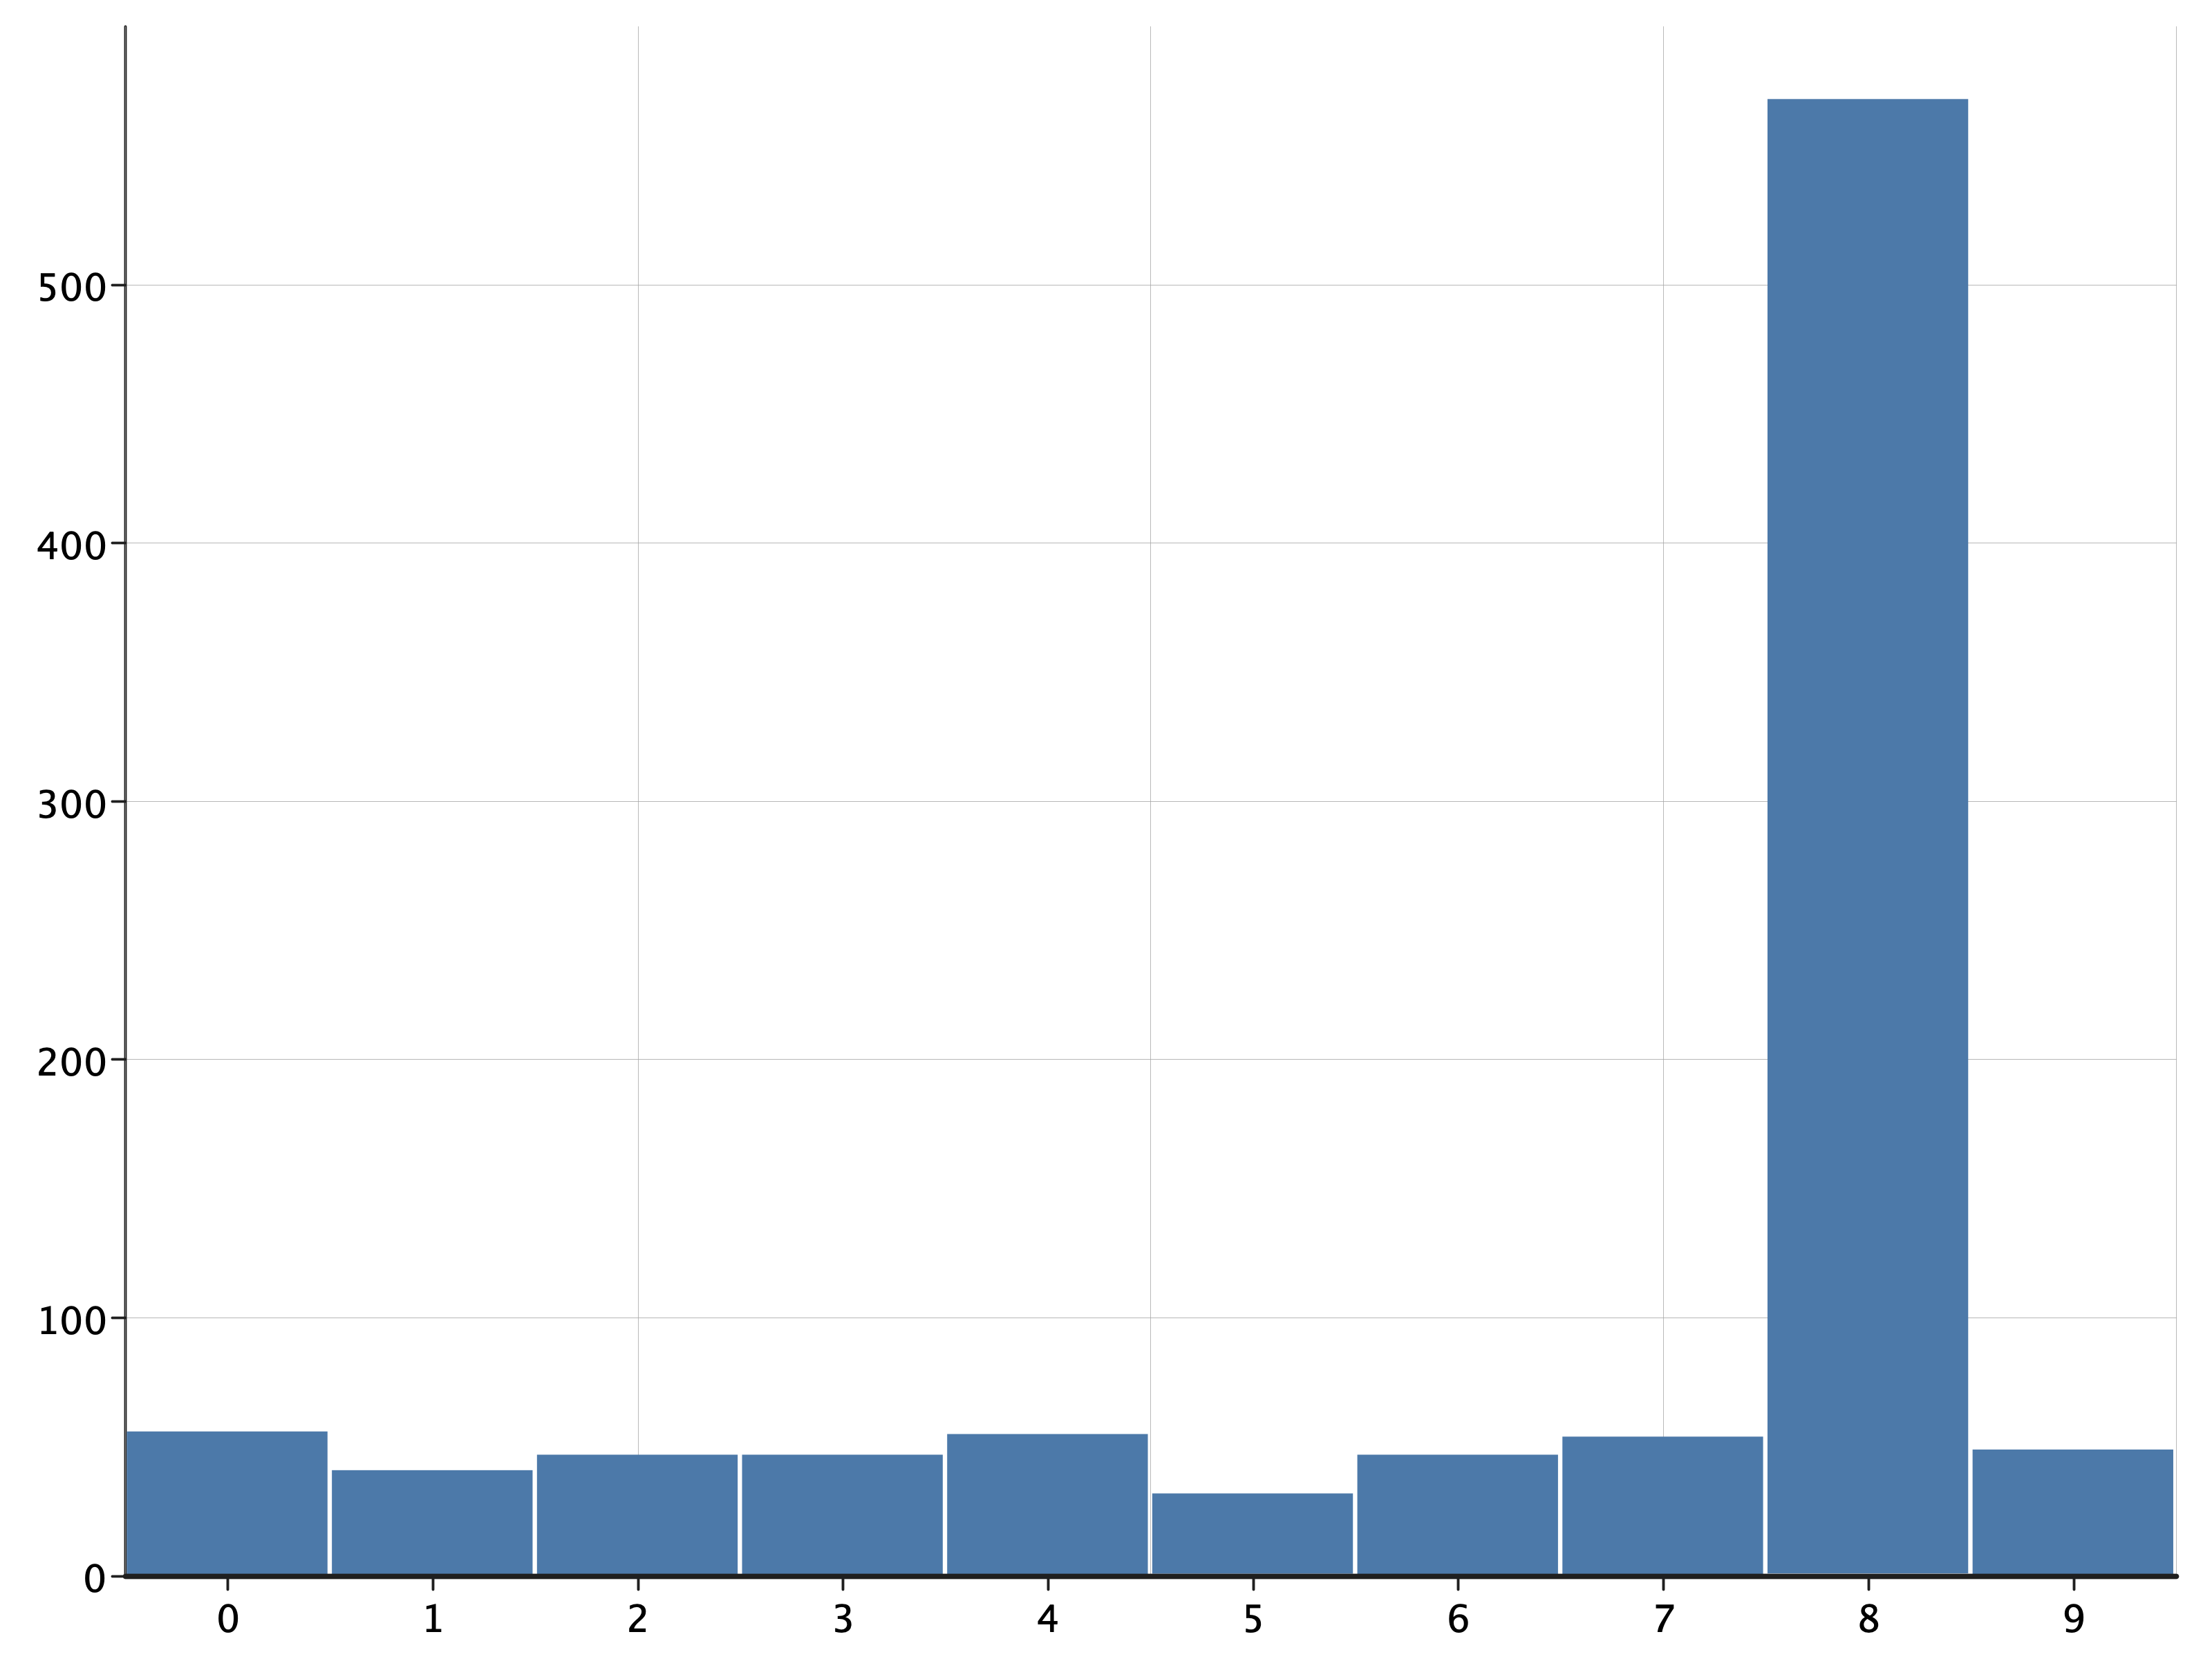

oneBandit: BanditState = BanditState(
  Array(
    0.0,
    2.976100360524757,
    3.320624254718964,
    1.735391673758119,
    -0.1178421782132375,
    -0.4267401704485142,
    0.05976466063572933,
    1.9647217525681615,
    -1.1268489919523372,
    -0.11423861554973747,
    -1.6367143503567467,
    1.169397937010581,
    0.804300072782806,
    2.2835936434257436,
    2.31290098287337,
    2.6236486501806926,
    2.836115544022664,
    -0.7839856021716222,
    2.054859432324436,
    2.474021337551546,
    -0.9610215574366667,
    -1.6665573871211612,
    3.263486902771481,
    2.737138911325928,
    -0.15454857068858474,
    2.4385642340240636,
    1.6016866119680087,
    2.2073837929940456,
    2.4998150437397846,
    0.1438041237245966,
    0.3606162721163373,
    2.6577340535039324,
    2.769632524242227,
    -0.9252861813602815,
    0.2816266052603311,
    -0.7243237512391794,
    2.1141386653850893,
...

In [54]:
// plot distribution of rewards
val oneBandit = bandit(0.5, 10, r(qs), 1000)
DisplayData.png(renderBytes(
    BarChart(oneBandit.actions.toList.sortBy(_._1).map(_._2.toDouble).toSeq)
  .standard(xLabels = oneBandit.actions.keys.toSeq.sorted.map(_.toString))
  .hline(0))).show()

In [55]:
// Calculate the average reward for n 10-arm bandit models with steps and an epsilon-greedy method
def averageReward(n: Int, steps: Int, epsilon: Double) = {
    Vector.fill(n)(DenseVector(bandit(epsilon, 10, r(qs), steps).reward)).
      reduce(_ + _).map(_ / n)
}

defined function averageReward

In [57]:
val aveReward = averageReward(2000, 1000, 0.1)

aveReward: DenseVector[Double] = DenseVector(0.0, -0.9426273839522797, 0.26889712041848457, 0.5332672833580145, 0.5592108247423051, 0.6056358871271748, 0.6515241800245118, 0.6513086554499391, 0.6469931829377825, 0.7089842469243052, 0.66667240644473, 0.7082220589822795, 0.6853350709144816, 0.7442480967859841, 0.7333679234328236, 0.7605616555788542, 0.7801774338435793, 0.7875742317521988, 0.7732938950479266, 0.8079389127764451, 0.8242092185211091, 0.8290599121138151, 0.8357268085155818, 0.8389036026370922, 0.8517266494247785, 0.9054726316177655, 0.8760328141792109, 0.846222974505453, 0.9673659214993594, 0.9233230163685952, 0.9002610917535993, 0.9365621510181116, 0.9786856617181927, 0.9568787318575506, 0.9858490289296279, 1.0167017081287388, 0.9870224011843569, 1.0060798711049337, 0.9998857746758901, 1.0421054630796218, 1.0537332007460791, 1.0282931280576844, 1.008952977774679, 1.0208445677717755, 1.0609347426367055, 1.063006707436476, 1.1229697215325798, 1.1047251761098666, 1.07509788123

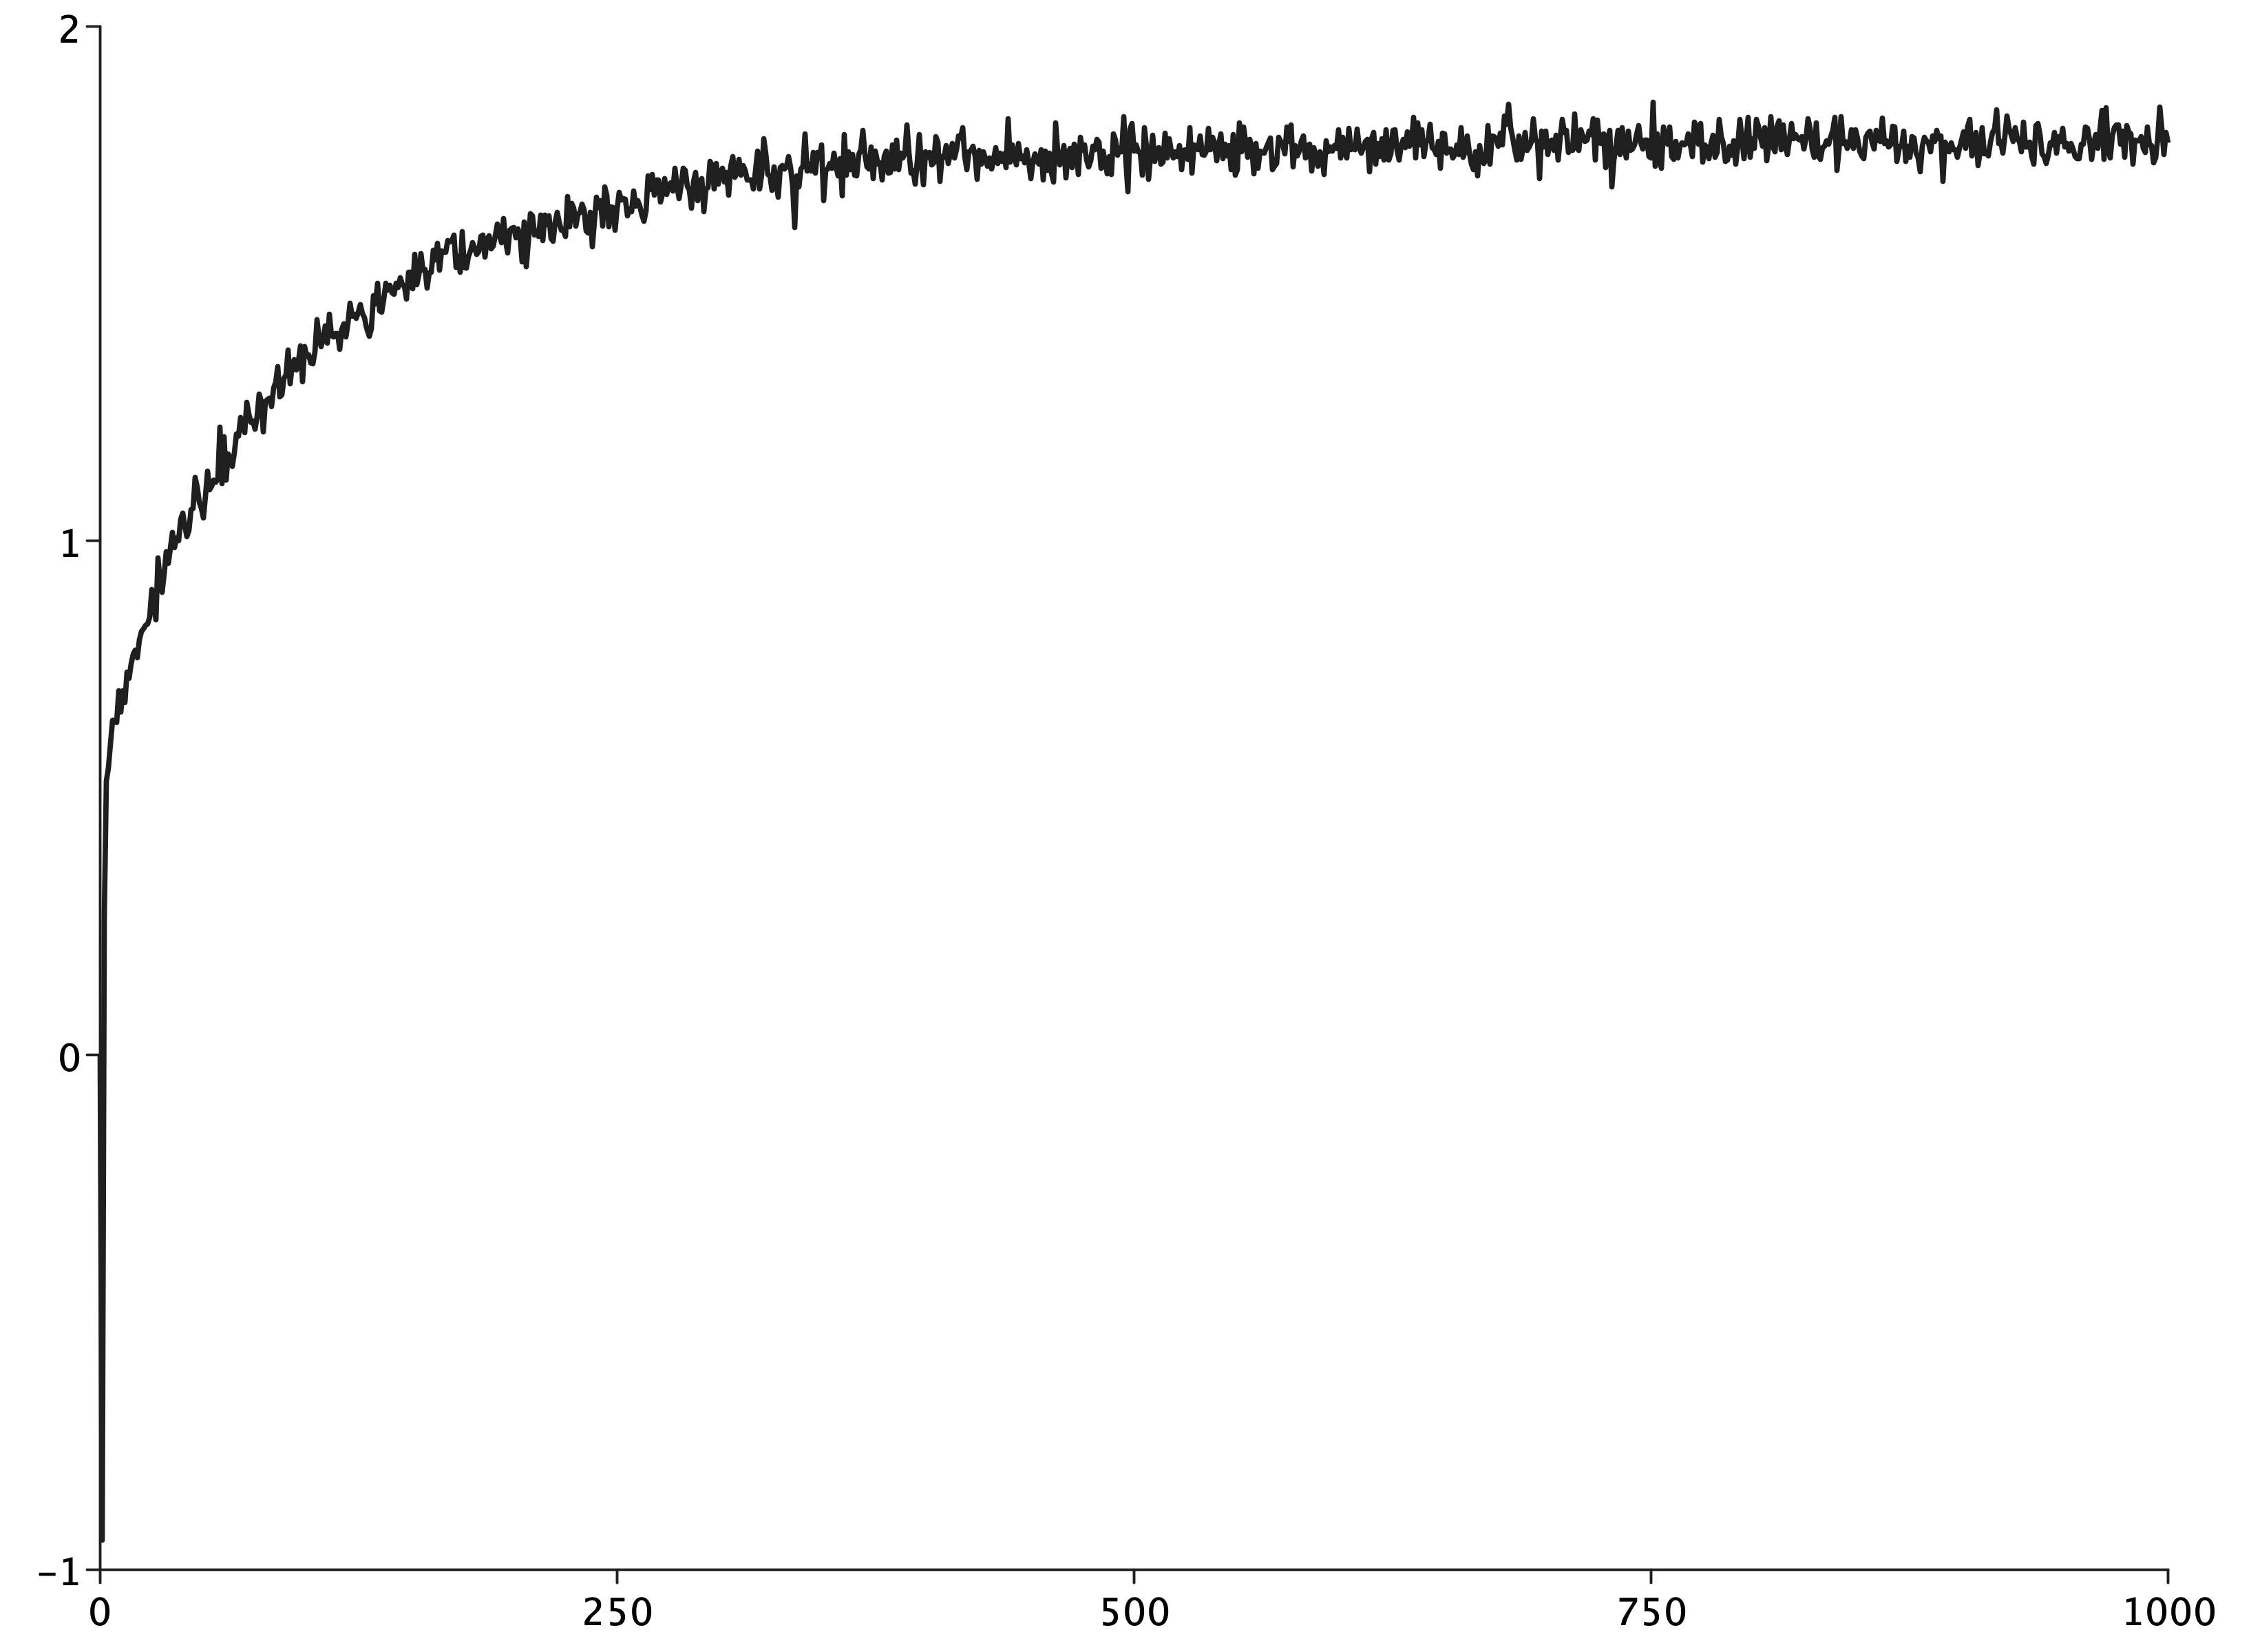

import com.cibo.evilplot.colors._



In [64]:
import com.cibo.evilplot.colors._

DisplayData
  .png(renderBytes(LinePlot(
      aveReward.data.zipWithIndex.map { case (reward, i) => Point(i, reward) }
    ).xAxis()
     .yAxis()
     .frame()
     .rightLegend()))
    .show()

In [59]:
val data = List(0.0, 0.1, 0.5).map ( eps => averageReward(2000, 1000, eps))

data: List[DenseVector[Double]] = List(
  DenseVector(0.0, -1.1743418790174853, 0.35628118154928096, 0.5444696198591045, 0.5745606123166515, 0.6011450064897833, 0.5860773160902875, 0.5773192948707362, 0.6551587600060409, 0.5929344059996865, 0.5869891978253066, 0.6014580560135625, 0.6169564700220459, 0.5993058562938953, 0.6159423995554062, 0.6226857540763373, 0.6156850091288895, 0.6482916431567618, 0.640230448244355, 0.6096791692857781, 0.5982924317357214, 0.6281804628861618, 0.6580875948509916, 0.6529535208980511, 0.6277957845742601, 0.6118020854733205, 0.6207439444919087, 0.6174124716245961, 0.6550331741316631, 0.6787972980107534, 0.6652070981057305, 0.612624838887662, 0.6552392240239654, 0.6820328585412322, 0.6446805628306075, 0.6682485541461307, 0.5799194256892576, 0.6647312818453811, 0.6418572597763432, 0.6186361430485355, 0.6287827275585954, 0.6523453583739043, 0.624009376918104, 0.6627575698581933, 0.6271505262888047, 0.6339295931690959, 0.655056139945157, 0.610440048793048, 0.62

In [64]:
import com.cibo.evilplot.plot.renderers.PathRenderer
import com.cibo.evilplot.colors._

DisplayData
  .png(renderBytes(Overlay(
        LinePlot(data(0).data.zipWithIndex.map { case (reward, i) => Point(i, reward) },
                Some(PathRenderer.named("epsilon = 0.0", HTMLNamedColors.dodgerBlue))),
        LinePlot(data(1).data.zipWithIndex.map { case (reward, i) => Point(i, reward) },
                Some(PathRenderer.named("epsilon = 0.0", HTMLNamedColors.red))),
        LinePlot(data(2).data.zipWithIndex.map { case (reward, i) => Point(i, reward) },
                Some(PathRenderer.named("epsilon = 0.0", HTMLNamedColors.green)))
       )
  .title("A Bunch of Bandits")
  .bottomLegend()
  .standard()))
   .show()

cmd64.sc:7: type mismatch;
 found   : Some[com.cibo.evilplot.plot.renderers.PathRenderer[Nothing]]
 required: Option[com.cibo.evilplot.plot.renderers.PathRenderer[com.cibo.evilplot.numeric.Point]]
                Some(PathRenderer.named("epsilon = 0.0", HTMLNamedColors.dodgerBlue))),
                    ^Compilation Failed

: 